In [2]:
import pandas as pd
import sqlite3

In [3]:
# Read sqlite query results into a pandas DataFrame
con_hotel = sqlite3.connect("/kaggle/input/yelpdata/yelpHotelData.db")
df_hotel = pd.read_sql_query("SELECT * from review", con_hotel)
# Verify that result of SQL query is stored in the dataframe
df_hotel.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,hotelID
0,6/8/2011,MyNjnxzZVTPq,IFTr6_6NI4CgCVavIL9k5g,Let me begin by saying that there are two kind...,5,18,11,28,N,tQfLGoolUMu2J0igcWcoZg
1,8/30/2011,BdD7fsPqHQL73hwENEDT-Q,c_-hF15XgNhlyy_TqzmdaA,The only place inside the Loop that you can st...,3,0,3,4,N,tQfLGoolUMu2J0igcWcoZg
2,6/26/2009,BfhqiyfC,CiwZ6S5ZizAFL5gypf8tLA,I have walked by the Tokyo Hotel countless tim...,5,12,14,23,N,tQfLGoolUMu2J0igcWcoZg
3,9/16/2010,Ol,nf3q2h-kSQoZK2jBY92FOg,"If you are considering staying here, watch thi...",1,8,2,6,N,tQfLGoolUMu2J0igcWcoZg
4,2/5/2010,i4HIAcNTjabdpG1K4F5Q2g,Sb3DJGdZ4Rq__CqxPbae-g,"This place is disgusting, absolutely horrible,...",3,11,4,9,N,tQfLGoolUMu2J0igcWcoZg


In [4]:
df_hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688329 entries, 0 to 688328
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           688329 non-null  object
 1   reviewID       688329 non-null  object
 2   reviewerID     688329 non-null  object
 3   reviewContent  688329 non-null  object
 4   rating         688329 non-null  int64 
 5   usefulCount    688329 non-null  int64 
 6   coolCount      688329 non-null  int64 
 7   funnyCount     688329 non-null  int64 
 8   flagged        688329 non-null  object
 9   hotelID        688329 non-null  object
dtypes: int64(4), object(6)
memory usage: 52.5+ MB


# EDA

Understanding Variales

In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
df_hotel.shape


(688329, 10)

In [6]:
df_hotel.columns

Index(['date', 'reviewID', 'reviewerID', 'reviewContent', 'rating',
       'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'hotelID'],
      dtype='object')

In [7]:
df_hotel.nunique(axis=0)

date               4593
reviewID         688329
reviewerID         5132
reviewContent    686477
rating                5
usefulCount          92
coolCount            88
funnyCount          120
flagged               4
hotelID          283291
dtype: int64

In [8]:
df_hotel.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,rating,usefulCount,coolCount,funnyCount
count,688329.000000,688329.000000,688329.000000,688329.000000
mean,3.701869,2.121377,1.508964,1.253232
std,1.082725,3.439871,2.991782,3.191009
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,1.000000
max,5.000000,177.000000,170.000000,246.000000


In [9]:
df_hotel.rating.unique()

array([5, 3, 1, 4, 2])

In [10]:
df_hotel.isna().sum()

date             0
reviewID         0
reviewerID       0
reviewContent    0
rating           0
usefulCount      0
coolCount        0
funnyCount       0
flagged          0
hotelID          0
dtype: int64

**Extracting the "Top Words" used by reviewers in their reviews**

Preprocessing Data: Removing Punctuation


In [11]:
# The re module raises the exception re. error if an error occurs while compiling or using a regular expression.
import re
# This module contains a number of functions to process standard Python strings.
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [12]:
def clean_text_round_1(text):
    text = text.lower() #lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removes Punctuation
    text = re.sub('\w*\d\w*','',text) # Removes Alphanumeric Characters    
    return text
round_1 = lambda x: clean_text_round_1(x)

In [13]:
df_review= df_hotel['reviewContent']
df_review= df_review.sample(n = 50000) #Using only 50000
df_review.head()

134206    I have been wanted to try BLT Burger in NY, bu...
331584    Happiest place on EARTH~!! I love, I MEAN LOVE...
71034     When I walked in, I was anticipating an Island...
209027    Another failure in finding interesting sodas a...
277524    I took advantage of the 30% off Friends and Fa...
Name: reviewContent, dtype: object

In [14]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [15]:
# Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [16]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [17]:
data_review_cleaned = pd.DataFrame(df_review.map(lambda a: clean_numbers(a)))

In [18]:
data_review_cleaned = pd.DataFrame(df_review.map(lambda a: clean_char(a)))

In [19]:
data_review_cleaned = pd.DataFrame(df_review.map(lambda a: clean_text(a)))


In [20]:
data_review_cleaned

,reviewContent
134206,want tri blt burger ny ran time so went check ...
331584,happiest place earth ! ! love mean love disney...
71034,walk in anticip island wannab case wrong absol...
209027,anoth failur find interest soda treat actual s...
277524,took advantag 30 friend famili sale past weeke...
...,...
413132,meeeeeeehhhhhhhhhhhhhh took favorit salad menu...
583227,best biggbi kalamazoo
643810,love small sushi spot market near castro fish ...
595442,first pizza locat unfortun receiv someon els p...


In [21]:
#rev_string = " "
#for i in range(len(data_review_cleaned)):
    #rev_string +=data_review_cleaned['reviewContent'][i]+" "
#rev_string

In [22]:
def clean_text_round_2(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('[''""..._]', '', text)
    return text
round2 = lambda x: clean_text_round_2(x)

In [23]:
data_review_cleaned = pd.DataFrame(data_review_cleaned.reviewContent.apply(round2))

**Creating a Document Term Matrix (DTM)**


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(data_review_cleaned.reviewContent)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_review_cleaned.index
data_dtm


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00001,0001,000th,001,003897,007,00854,00am,...,zy,zydeco,zygmunt,zynthesi,zyrtec,zzz,zzzz,zzzzz,zzzzzzzzzz,zzzzzzzzzzzzbing
134206,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data_dtm_transposed = data_dtm.T

**Finding Top 30 Words**

In [26]:
top_words = {}
for o in data_dtm_transposed.columns:
    top = data_dtm_transposed[o].sort_values(ascending = False).head(50)
    top_words[o] = list(zip(top.index, top.values))
#top_words

In [27]:
data = data_dtm_transposed

In [28]:
from collections import Counter

words = []
for user_id in data.columns:
    top = [word for (word,count) in top_words[user_id]]
    for t in top:
        words.append(t)

In [29]:
common_words_count  = Counter(words).most_common()

In [30]:
df_common_words = pd.DataFrame(common_words_count, columns = ['word', 'count'])
df_common_words

,word,count
0,peper,22042
1,pepeino,22020
2,pepe,21822
3,peperjack,21705
4,pepboy,21316
...,...,...
44083,meeeeeeehhhhhhhhhhhhhh,1
44084,1ish,1
44085,raaaazi,1
44086,kuh,1


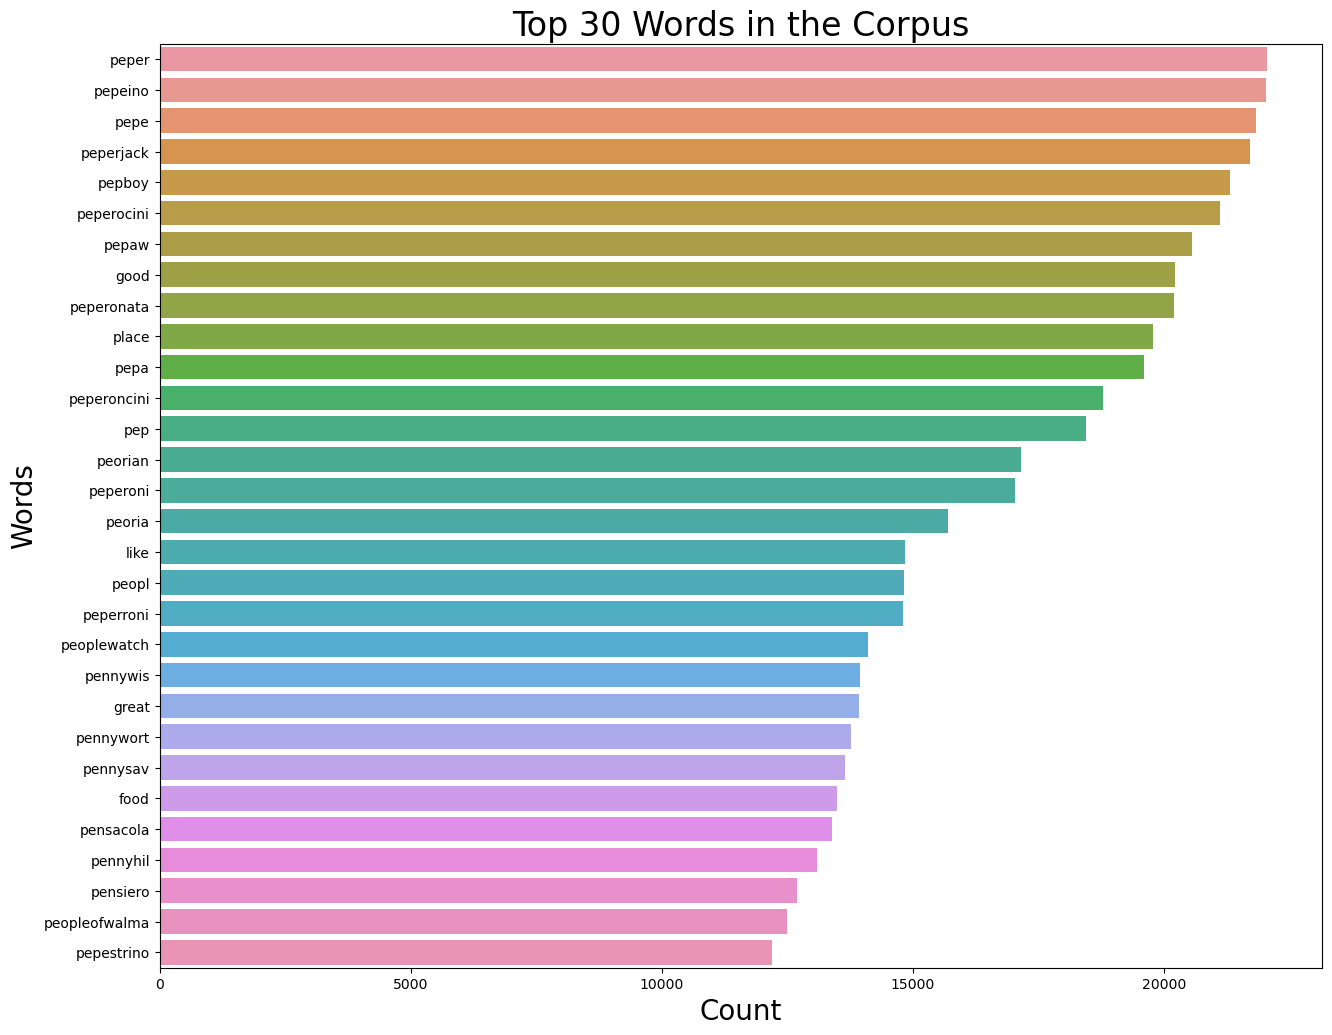

In [31]:
# plot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 12)
ax = sns.barplot(x='count', y='word', data=df_common_words[:30])
ax.set_title('Top 30 Words in the Corpus', size = 24)
ax.set_xlabel('Count', size = 20)
ax.set_ylabel("Words", size = 20)

fig.savefig('top_30_words.png')

**Word Cloud**

(-0.5, 799.5, 399.5, -0.5)

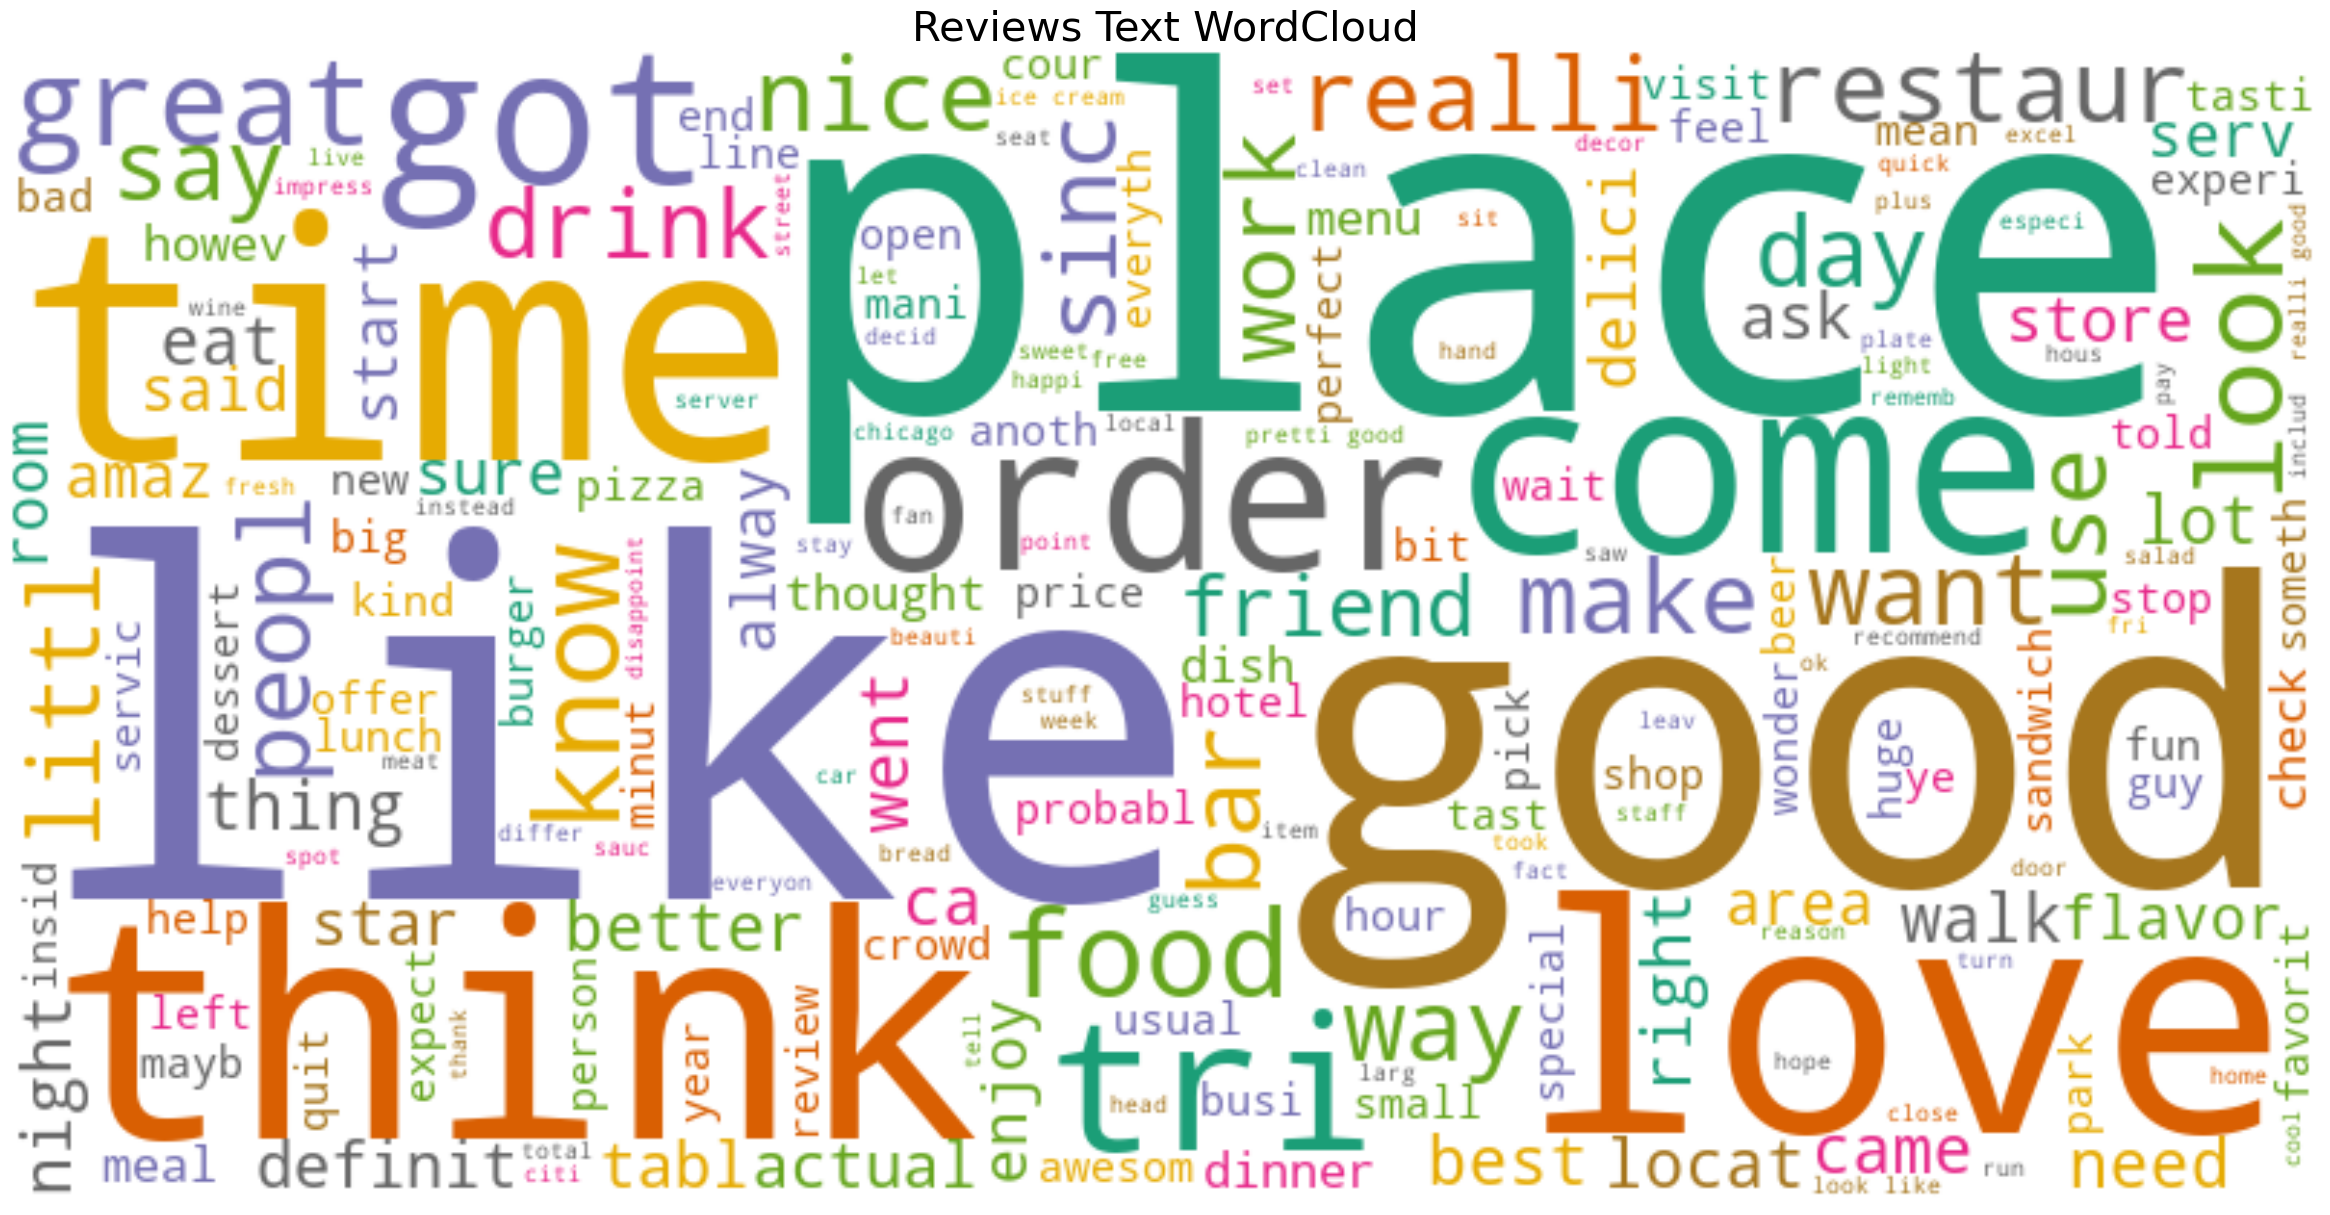

In [32]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Adding the Stop Words
stop_words = text.ENGLISH_STOP_WORDS
wc = WordCloud(width = 800, height = 400, stopwords = stop_words, background_color = 'white', colormap = 'Dark2', 
               max_font_size = 170, random_state = 45)
data_for_wc = pd.DataFrame()
data_for_wc['reviewContent'] = data_review_cleaned['reviewContent']
data_for_wc = data_for_wc.reset_index(drop = True)
#data_for_wc
#Extracting text of all reviews into one string for WordCloud
text_wc = ' '
for i in range(len(data_for_wc)):
    text_wc += data_for_wc['reviewContent'][i]
cloud = wc.generate(text_wc)
plt.figure(figsize=(30,15))
plt.title('Reviews Text WordCloud', fontsize = 30)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

# Dividing the data for Training and Testing!

**Logistic Regression**

In [33]:
df = pd.read_sql("select * FROM review" ,con_hotel)
df= df.sample(n=50000)
df.shape

(50000, 10)

In [34]:
df['reviewID'].replace('', np.nan, inplace=True)
df.dropna(subset=['reviewID'], inplace=True)

In [35]:
#Convert NR->N , YR->Y
df.loc[df['flagged'] == "NR", 'flagged'] = "N"
df.loc[df['flagged'] == "YR", 'flagged'] = "Y"

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 408330 to 554306
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           50000 non-null  object
 1   reviewID       50000 non-null  object
 2   reviewerID     50000 non-null  object
 3   reviewContent  50000 non-null  object
 4   rating         50000 non-null  int64 
 5   usefulCount    50000 non-null  int64 
 6   coolCount      50000 non-null  int64 
 7   funnyCount     50000 non-null  int64 
 8   flagged        50000 non-null  object
 9   hotelID        50000 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.2+ MB


In [37]:
# Create a binary dependent variable Target
# Target = 1 for a Spam = Yes, 0 for Non Spam = No
df['Target'] = df['flagged'].map(lambda x : 1 \
                if x == 'Y' else 0)

In [38]:
# Dropping flagged column
df = df.drop('flagged', axis=1)

In [39]:
from textblob import TextBlob

In [40]:
#Add sentiment analysis columns
def reviewFeatures(row):
    review = row['reviewContent']
    analysis = TextBlob(review)
    return pd.Series([len(review), analysis.sentiment.polarity, analysis.sentiment.subjectivity]
           , index = ['reviewLength', 'sentimentPolarity', 'sentimentSubjectivity'])

df[['reviewLength', 'sentimentPolarity', 'sentimentSubjectivity']]  = df.apply(reviewFeatures, axis=1)

In [41]:
#import pickle

#pickle.dump(df, open("ModifiedData.pkl", "wb"))
# X_test['reviewContent'] = pickle.load( open(file_X_test, "rb"))
y = df['Target']
X = df.drop(['Target','date','reviewID','reviewerID','reviewContent','hotelID'], axis=1)
X.head()

,rating,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity
408330,5,0,0,0,77.0,0.500000,0.650000
197554,4,1,2,1,696.0,0.206410,0.690385
311875,2,1,2,2,331.0,0.483333,0.666667
12782,4,1,0,0,571.0,0.245000,0.505000
592870,4,2,1,1,801.0,0.259464,0.500714


In [42]:
# Finding the number of flagged values as 1 and 0
y.value_counts(dropna = False)

0    30619
1    19381
Name: Target, dtype: int64

In [43]:
# Summary statistics of numeric variables
pd.options.display.float_format = '{:.2f}'.format
X.describe()

,rating,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,3.70,2.12,1.51,1.25,770.45,0.22,0.55
std,1.08,3.47,3.07,3.10,621.05,0.18,0.12
min,1.00,0.00,0.00,0.00,3.00,-1.00,0.00
25%,3.00,0.00,0.00,0.00,350.00,0.11,0.48
50%,4.00,1.00,0.00,0.00,608.00,0.21,0.55
75%,4.00,3.00,2.00,1.00,1002.00,0.31,0.62
max,5.00,91.00,170.00,124.00,4994.00,1.00,1.00


In [44]:
# Finding for correlation between variables
pd.options.display.float_format = '{:.2f}'.format
X.corr()
# # Correlation being saved to a csv file
corr = X.corr()
corr.to_csv("Corr_sp.csv", sep=',')
print(corr)

                       rating  usefulCount  coolCount  funnyCount  \
rating                   1.00         0.01       0.10       -0.02   
usefulCount              0.01         1.00       0.85        0.75   
coolCount                0.10         0.85       1.00        0.78   
funnyCount              -0.02         0.75       0.78        1.00   
reviewLength            -0.04         0.35       0.28        0.26   
sentimentPolarity        0.41        -0.09      -0.05       -0.11   
sentimentSubjectivity    0.11        -0.05      -0.03       -0.04   

                       reviewLength  sentimentPolarity  sentimentSubjectivity  
rating                        -0.04               0.41                   0.11  
usefulCount                    0.35              -0.09                  -0.05  
coolCount                      0.28              -0.05                  -0.03  
funnyCount                     0.26              -0.11                  -0.04  
reviewLength                   1.00            

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
Xcolumns  = X.columns
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_ros = pd.DataFrame(X_ros)
X_ros.columns = Xcolumns

In [47]:
#Logistic Regression with Upsampling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.20, random_state=42)

In [48]:
x_train

,rating,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity
22691,3,0,1,0,347.00,0.11,0.48
10989,4,0,0,2,276.00,0.16,0.44
7335,1,1,1,3,585.00,0.16,0.41
10171,3,0,0,0,330.00,0.35,0.50
44359,4,0,0,1,856.00,0.14,0.65
...,...,...,...,...,...,...,...
54343,4,1,1,0,223.00,0.34,0.82
38158,2,9,3,3,353.00,0.09,0.71
860,2,2,0,2,351.00,0.42,0.63
15795,3,1,0,0,655.00,0.30,0.60


In [49]:
# All parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
predictions = logisticRegr.predict(x_test)
from sklearn import metrics
from sklearn.metrics import recall_score
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)

print("Accuracy(Logistic Regression) = " + str((score*100).round(3))+"%")

Accuracy(Logistic Regression) = 55.536%


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.44      0.49      6124
           1       0.54      0.68      0.60      6124

    accuracy                           0.56     12248
   macro avg       0.56      0.56      0.55     12248
weighted avg       0.56      0.56      0.55     12248



**Naive Bayes**

In [52]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train);
pred = model.predict(x_test)
acc = model.score(x_test,y_test)

print("Accuracy(Gaussian Naive Bayes) = " + str((acc*100).round(3))+"%")

Accuracy(Gaussian Naive Bayes) = 54.148%


In [53]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

BernNB = BernoulliNB(binarize = False)
BernNB.fit(x_train, y_train)

y_expected = y_test
y_pred_ber = BernNB.predict(x_test)


print("Accuracy (Bernoulli Naive Bayes): "+ str(((accuracy_score(y_expected, y_pred_ber))*100).round(3)) + "%")

Accuracy (Bernoulli Naive Bayes): 52.956%


In [54]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model_mn = MultinomialNB()
model_mn.fit(x_train.drop(['sentimentPolarity'], axis = 1), y_train)


accuracy_multinomial_nb = model_mn.score(x_test.drop(['sentimentPolarity'], axis = 1), y_test)
print("Accuracy (Multinomial Naive Bayes): "+ str((accuracy_multinomial_nb*100).round(3)) + "%")

Accuracy (Multinomial Naive Bayes): 54.139%


In [55]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [56]:
svc_predictions = svc.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ' + str((accuracy_score(y_test,svc_predictions)*100).round(3)) + "%")


Accuracy score: 52.294%


In [58]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
knn_predictions = knn.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ' + str((accuracy_score(knn_predictions,y_test )*100).round(3)) + "%")


Accuracy score: 57.03%


In [61]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [62]:
dtree_predictions = dtree_model.predict(x_test) 

In [63]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: '+ str((accuracy_score(dtree_predictions,y_test )*100).round(3)) + "%")

Accuracy score: 54.948%


In [64]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [65]:
sgdpredicted = sgd_clf.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: '+ str((accuracy_score(sgdpredicted,y_test )*100).round(3)) + "%")

Accuracy score: 52.18%


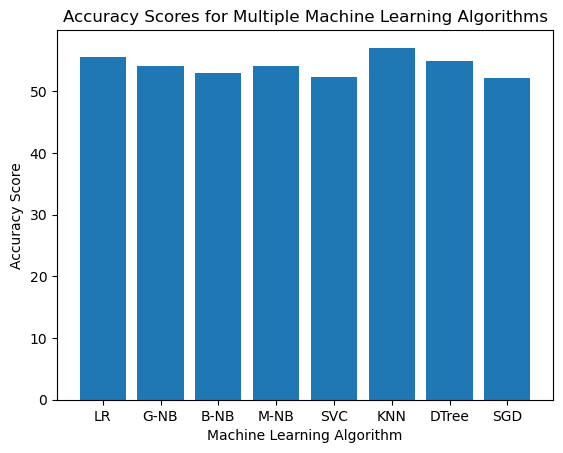

In [72]:
import matplotlib.pyplot as plt

# define accuracy scores for each algorithm
lr=55.536
gaussian_nb= 54.148
bernoulli_nb= 52.956
multinomial_nb=  54.139
svc= 52.294
knn_score = 57.03
dt_score =  54.948
sgd=52.18



# create a list of algorithm names and accuracy scores
algorithms = ['LR', 'G-NB', 'B-NB', 'M-NB', 'SVC', 'KNN', 'DTree','SGD']
scores = [lr,gaussian_nb,bernoulli_nb,multinomial_nb,svc,knn_score,dt_score,sgd]

# create a bar chart
plt.bar(algorithms, scores)

# set the chart title and axis labels
plt.title('Accuracy Scores for Multiple Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy Score')

# display the chart
plt.show()
